## Created by Davin Yulion

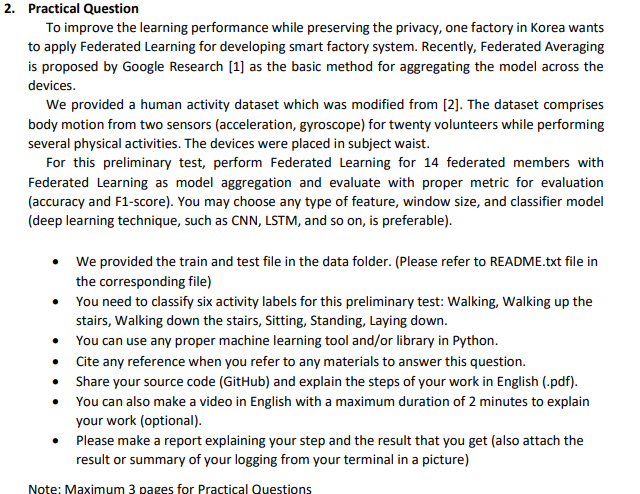

----------------------------------------------- Data Summary ---------------------------------------------------------
<br>
This dataset contains 20 subjects that are recorded doing various activity. Each subject was recorded using
2 accelerometers and 1 gyroscope. There are 6 activities that are described in this dataset , which are :

1. Walking activity
2. Walking up the stairs activity
3. Walking down the stairs activity
4. Sitting activity
5. Standing activity
6. Laying down activity

The training contains 14 subjects (train.csv) , while the rest is used for testing (test.csv) . The columns for the
CSV is described as follows:

Column 1: Subject id
Column 2: Acceleration value from accelerometer 1 in x axis.
Column 3: Acceleration value from accelerometer 1 in y axis.
Column 4: Acceleration value from accelerometer 1 in z axis.
Column 5: Gyro value from gyroscope 1 in x axis.
Column 6: Gyro value from gyroscope 1 in y axis.
Column 7: Gyro value from gyroscope 1 in z axis.
Column 8: Acceleration value from accelerometer 2 in x axis.
Column 9: Acceleration value from accelerometer 2 in y axis.
Column 10: Acceleration value from accelerometer 2 in z axis.
Column 11: Label 
-------------------------------------------------------------------------------------------------------------------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import itertools

from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Read Train and Test Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape, test.shape)
train.head()

(528256, 11) (263424, 11)


,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
0,3,-0.049573,0.051482,0.061498,0.357428,0.876525,-1.077288,0.951736,-0.303094,-0.133766,5
1,3,-0.085298,0.048648,0.083263,0.337020,0.840771,-1.329607,0.918129,-0.301953,-0.111281,5
2,3,-0.046568,0.057793,0.114970,0.320000,0.909147,-0.788201,0.958863,-0.288855,-0.078756,5
3,3,0.001564,0.068723,0.144465,0.308596,0.773221,-0.313850,1.008886,-0.274002,-0.048346,5
4,3,-0.026644,0.088834,0.188589,0.308176,0.691534,-0.457948,0.982454,-0.250003,-0.003217,5


### Create X and Y for train and test data
##### X contains: acc1_x, acc1_y, acc1_z, gyro1_x, gyro1_y, gyro1_z, acc2_x, acc2_y, acc2_z
##### Y contains: label

In [4]:
y_train = train.label
X_train = train.drop(['subject', 'label'], axis=1)
y_test = test.label
X_test = test.drop(['subject', 'label'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (528256, 9)
Test data size :  (263424, 9)


#### Label for Plotting Confusion Matrix

In [5]:
# 1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5:'STANDING', 6: 'LAYING'
labels = ['WALKING', 'WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

#### Function to check Machine Learning model performance

In [6]:
def performanceModel(model, xTrain, yTrain, xTest, yTest, classLabel, \
                     cmNormalize = True, printCM = True, cmMap = plt.cm.Greens):
    
    # Store results performance model
    results = dict()
    
    print('Training Model')
    
    # Time of model starts training
    trainStartTime = datetime.now()
    
    # Process Training Model
    model.fit(xTrain, yTrain)
    
    trainEndTime = datetime.now()
    results['traningTime'] = trainEndTime - trainStartTime
    
    print('Training time(HH:MM:SS.ms) - {}\n\n'.format(results['traningTime']))
    
    # predict test data for testing the model
    print('Testing Model')
    
    testStartTime = datetime.now()
    y_pred = model.predict(xTest)
    testEndTime = datetime.now()
    print('Done \n \n')
    results['testingTime'] = testEndTime - testStartTime
    print('Testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testingTime']))
    results['predicted'] = y_pred
    
    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if printCM: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
    
    
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=classLabel, normalize=True, title='Normalized confusion matrix', cmap = cmMap)
    plt.show()
    
     # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

#### Function for ploting Confusion Matrix

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print("CM")
    print(cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [19]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout

#### KNN
###### Classifier implementing the k-nearest neighbors vote.
This study tries n_neighbors = 16

Training Model
Training time(HH:MM:SS.ms) - 0:00:02.510478


Testing Model


C:\Users\NPiC\anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Done 
 

Testing time(HH:MM:SS:ms) - 0:01:43.454025


---------------------
|      Accuracy      |
---------------------

    0.7244404458211856


--------------------
| Confusion Matrix |
--------------------

 [[30345  5691  7504   334   798     0]
 [ 9937 26290  4570    54   237     0]
 [11385  4205 22840   203   279     0]
 [  183    11    80 33684  9562     0]
 [  706   122   280 11704 34548     0]
 [ 3968   770     6     0     0 43128]]
CM
[[30345  5691  7504   334   798     0]
 [ 9937 26290  4570    54   237     0]
 [11385  4205 22840   203   279     0]
 [  183    11    80 33684  9562     0]
 [  706   122   280 11704 34548     0]
 [ 3968   770     6     0     0 43128]]


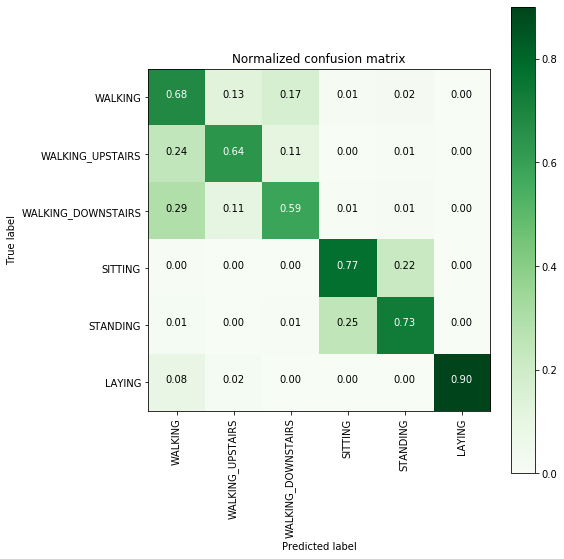

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.54      0.68      0.60     44672
           2       0.71      0.64      0.67     41088
           3       0.65      0.59      0.62     38912
           4       0.73      0.77      0.75     43520
           5       0.76      0.73      0.74     47360
           6       1.00      0.90      0.95     47872

    accuracy                           0.72    263424
   macro avg       0.73      0.72      0.72    263424
weighted avg       0.74      0.72      0.73    263424



In [20]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 16)

knn_result = performanceModel(knn, X_train, y_train, X_test, y_test, classLabel=labels)


### Dementional Reduction using PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, svd_solver='full')
x_trainPCA = pca.fit_transform(X_train)
x_testPCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.40884595, 0.21548426, 0.13061819, 0.07262294, 0.06917282,
       0.06251954])

### KNN with Dementional Reduction using PCA

Training Model
Training time(HH:MM:SS.ms) - 0:00:02.014116


Testing Model
Done 
 

Testing time(HH:MM:SS:ms) - 0:00:47.789564


---------------------
|      Accuracy      |
---------------------

    0.6930727648202138


--------------------
| Confusion Matrix |
--------------------

 [[27220  8972  7121   461   898     0]
 [10426 24637  5086   326   613     0]
 [11739  6646 20106   212   209     0]
 [  189   117    52 33394  9768     0]
 [ 1025   239   200 11810 34086     0]
 [ 1294   453  2996     0     0 43129]]
CM
[[27220  8972  7121   461   898     0]
 [10426 24637  5086   326   613     0]
 [11739  6646 20106   212   209     0]
 [  189   117    52 33394  9768     0]
 [ 1025   239   200 11810 34086     0]
 [ 1294   453  2996     0     0 43129]]


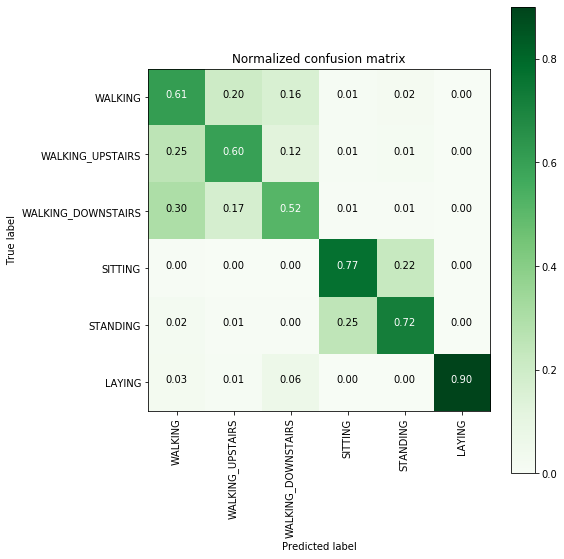

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.52      0.61      0.56     44672
           2       0.60      0.60      0.60     41088
           3       0.57      0.52      0.54     38912
           4       0.72      0.77      0.74     43520
           5       0.75      0.72      0.73     47360
           6       1.00      0.90      0.95     47872

    accuracy                           0.69    263424
   macro avg       0.69      0.69      0.69    263424
weighted avg       0.70      0.69      0.70    263424



In [97]:
knn_result = performanceModel(knn, x_trainPCA, y_train, x_testPCA, y_test, classLabel=labels)

### SVC using One Vs Rest Classifier

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

OvR_SvC_clf2 = OneVsRestClassifier(SVC())

Training Model
Training time(HH:MM:SS.ms) - 2:39:20.520780


Testing Model
Done 
 

Testing time(HH:MM:SS:ms) - 0:43:26.947544


---------------------
|      Accuracy      |
---------------------

    0.7495596452866861


--------------------
| Confusion Matrix |
--------------------

 [[32788  4525  6266   317   776     0]
 [ 9109 27176  4514    19   270     0]
 [ 9583  4107 24767   330   125     0]
 [  121    22   170 35011  8196     0]
 [  876   105   289 11505 34585     0]
 [    0  4737    10     0     0 43125]]
CM
[[32788  4525  6266   317   776     0]
 [ 9109 27176  4514    19   270     0]
 [ 9583  4107 24767   330   125     0]
 [  121    22   170 35011  8196     0]
 [  876   105   289 11505 34585     0]
 [    0  4737    10     0     0 43125]]


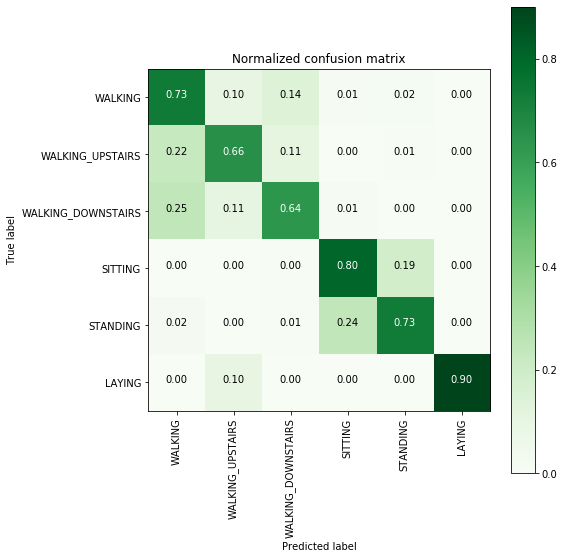

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.62      0.73      0.68     44672
           2       0.67      0.66      0.66     41088
           3       0.69      0.64      0.66     38912
           4       0.74      0.80      0.77     43520
           5       0.79      0.73      0.76     47360
           6       1.00      0.90      0.95     47872

    accuracy                           0.75    263424
   macro avg       0.75      0.74      0.75    263424
weighted avg       0.76      0.75      0.75    263424



In [23]:
log_SvC2 = performanceModel(OvR_SvC_clf2, x_trainPCA, y_train, x_testPCA, y_test, classLabel=labels)

### SVC using LDA to reduce the dimensionality

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

x_trainLDA = lda.fit_transform(X_train, y_train)
x_testLDA = lda.transform(X_test)

explained_varianceLDA = lda.explained_variance_ratio_
explained_varianceLDA

array([9.58165889e-01, 4.13668874e-02, 2.47517657e-04, 2.16106275e-04,
       3.59955327e-06])

### SVC with Dementional Reduction LDA (Linear Discriminant Analysis) 

Training Model
Training time(HH:MM:SS.ms) - 4:44:07.668232


Testing Model
Done 
 

Testing time(HH:MM:SS:ms) - 0:56:25.148583


---------------------
|      Accuracy      |
---------------------

    0.6699541423712342


--------------------
| Confusion Matrix |
--------------------

 [[20699  5341 10647  2918  5067     0]
 [ 8609 20711  9194   129  2445     0]
 [ 7158  4274 22720  2513  2226    21]
 [  212    12   274 34815  8207     0]
 [  976   106   718 11149 34411     0]
 [    0  4736     0    10     0 43126]]
CM
[[20699  5341 10647  2918  5067     0]
 [ 8609 20711  9194   129  2445     0]
 [ 7158  4274 22720  2513  2226    21]
 [  212    12   274 34815  8207     0]
 [  976   106   718 11149 34411     0]
 [    0  4736     0    10     0 43126]]


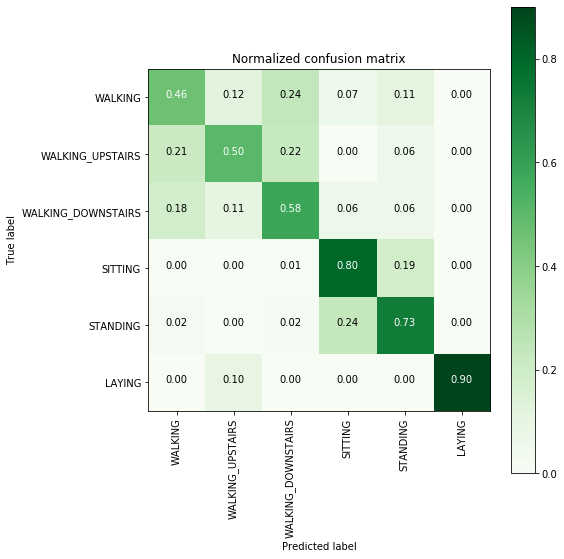

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.55      0.46      0.50     44672
           2       0.59      0.50      0.54     41088
           3       0.52      0.58      0.55     38912
           4       0.68      0.80      0.73     43520
           5       0.66      0.73      0.69     47360
           6       1.00      0.90      0.95     47872

    accuracy                           0.67    263424
   macro avg       0.67      0.66      0.66    263424
weighted avg       0.67      0.67      0.67    263424



In [94]:
OvR_SvC_clfLDA = OneVsRestClassifier(SVC())

log_SvCLDA = performanceModel(OvR_SvC_clfLDA, x_trainLDA, y_train, x_testLDA, y_test, classLabel=labels)

### SMOTE for Imbalance data 

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y1 = oversample.fit_resample(train.drop(['label'], axis=1),train.label)

In [13]:
y_train_smote = y1
X_train_smote = X1.drop(['subject'], axis=1)
print('Training data size : ', X_train_smote.shape)
print('Test data size : ', X_test.shape)

Training data size :  (646656, 9)
Test data size :  (263424, 9)


In [14]:
y1.unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [ ]:
log_SvC_smote = performanceModel(OvR_SvC_clf2, X_train_smote, y_train_smote, X_test, y_test, classLabel=labels)

Training Model
Training time(HH:MM:SS.ms) - 7:27:38.244360


Testing Model
